In [7]:
import matplotlib.pyplot as plt
import numpy as np

In the following, we work in a $(z,y)$ axis system, as in figure 5.1.

In [50]:
#Constants:

c=3*10**8 #Speed of light in m.s^{-1}
me=5.11*10**-4 #Mass of the electron in GeV/c²

#Parameters:

q=0.3 #for a particle with a charge 1.6*10**-19 C
e=1.6*10**-19 #Elementary charge
B=0.5 #Magnetic field in T
L=0.01 #length of the magnetic zone, in m
d=0.005 #length of the dectectors


d1=0.0125 #distance between the particle gun and the first sensor
d2=0.0075 #distance bewteen the second sensor and the magnetic zone
d3=0.0075 #distance between the magnetic zone and the third sensor

Let's define the system such that the particle come from the right to left, as in the figure.

In [51]:
#Initial position:

z0=0.05
y0=0.005

#Initial momentum in GeV/c:

p_z0=-0.002
p_y0=0

#Initial velocities in c:

v_z0=p_z0/me
v_y0=p_y0/me

Now we need to introduce the kinematics of the particle in each of the three zone: before B-field (first zone), inside B-field, after B-field.

In [52]:
def Kinematic_First_Zone(z,y,vz,vy):
    "Arguments: (z,y), the position at the entrance of the first zone (position of the particle gun); "
    "(vz,vy) the velocities at the entrance of the first zone."
    "Return: lists of the positions and the velocities of the particle at each instant; 'i' the last used index."
    
    dt=0.0000001 #Time step
    
    Z,Y,Vz,Vy=[],[],[],[] #Lists of positions and velocities
    
    #Implementation of the initial conditions:
    Z.append(z)
    Y.append(y)
    Vz.append(vz)
    Vy.append(vy)
    
    i=0
    
    while Z[i]>Z[0]-(d1+d+d2):
        #Computation of the coordinates of the velocity
        Vz.append(Vz[0])
        Vy.append(Vy[0])
        
        #Computation of the coordinates of the positions
        Z.append(Z[i]+Vz[i]*dt)
        Y.append(Y[i]+Vy[i]*dt)
        
        i=i+1
        
    return (Z,Y,Vz,Vy,i)

In [56]:
def Kinematic_B_Field(z,y,vz,vy):
    "Arguments: (z,y), the position at the entrance of the magnetic zone"
    "Return: lists of the positions and the velocities of the particle at each instant; 'i' the last used index"
    
    dt=0.00001 #Time step
    
    Z,Y,Vz,Vy=[],[],[],[] #Lists of positions and velocities
    
    v=0 #Velocity
    g=0 #Inverse Lorentz coefficient
    
    #Implementation of the initial conditions:
    Z.append(z)
    Y.append(y)
    Vz.append(vz)
    Vy.append(vy)
    
    i=0 #Index
    
    v0=np.sqrt((Vz[0]**2+Vy[0]**2))
    
    while Z[i]>Z[0]-L: #While the particle is inside the magnetic zone
        #Computation of v and g
        v=np.sqrt((Vz[i]**2+Vy[i]**2))
        g=np.sqrt(1-(v/c)**2)
        
        #Computation of the velocities
        Vz.append(v*np.cos(q*B*g*i*dt/me))
        Vy.append(-v*np.sin(q*B*g*i*dt/me))
        
        #Computation of the positions
        Z.append(v*me/(g*q*B)*np.sin(q*B*g*i*dt/me)+Z[0])
        Y.append(v*me/(g*q*B)*(1-np.cos(q*B*g*i*dt/me))+Y[0])
        
        i=i+1
        
    return (Z,Y,Vz,Vy,i)

In [57]:
def plot_Kinematic_B_Field(z,y,vz,vy):
    Z,Y,Vz,Vy=[],[],[],[]
    j=0
    
    Z,Y,Vz,Vy,j=Kinematic_B_Field(z,y,vz,vy)
    plt.plot(Z,Y)
    plt.show

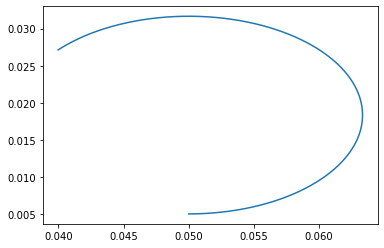

In [58]:
plot_Kinematic_B_Field(z0,y0,v_z0,v_y0)

In [42]:
def Kinematic_Third_Zone(z,y,vz,vy):
    "Arguments: (z,y), the position at the entrance of the third zone (position after the B-field); "
    "(vz,vy) the velocities at the entrance of the third zone."
    "Return: lists of the positions and the velocities of the particle at each instant; 'i' the last used index; 'k' the index for which the particle is at the third sensor."
    
    dt=0.0000001 #Time step
    
    Z,Y,Vz,Vy=[],[],[],[] #Lists of positions and velocities
    
    v=0 #Velocity
    g=0 #Inverse Lorentz coefficient
    
    #Implementation of the initial conditions:
    Z.append(z)
    Y.append(y)
    Vz.append(vz)
    Vy.append(vy)
    
    k=0 #We will save the index at the corresponding to the third sensor
    i=0
    
    while Z[i]>0:
        #Computation of the coordinates of the velocity
        Vz.append(Vz[0])
        Vy.append(Vy[0])
        
        #Computation of the coordinates of the position
        Z.append(Z[i]+Vz[i]*dt)
        Y.append(Y[i]+Vy[i]*dt)
        
        if Z[i]==d3:
            k=i
        
        i=i+1
        
    return (Z,Y,Vz,Vy,i,k)

Now we can define the tracker, the main function:

In [43]:
def Tracker():
    "Arguments:"
    "Return: Lists of positions, velocities during the whole experiment; the index at which the particle reach the 3rd sensor and the last index (4th sensor)"
    
    dt=0.000001 #Time step
    
    Z,Y,Vz,Vy=[],[],[],[] #Lists of positions and velocities
    
    Z1,Y1,Vz1,Vy1=[],[],[],[] #Lists of positions and velocities in the first zone
    
    ZB,YB,VzB,VyB=[],[],[],[] #Lists of positions and velocities in the magnetic field
    
    Z3,Y3,Vz3,Vy3=[],[],[],[] #Lists of positions and velocities in the third zone
    
    #Implementation of the initial conditions:
    Z1.append(z0)
    Y1.append(y0)
    Vz1.append(v_z0)
    Vy1.append(v_y0)
    
    i=0 #Index
    
    #First zone(particle gun --> beginning magnetic zone):
    Z1,Y1,Vz1,Vy1,i=Kinematic_First_Zone(Z1[0],Y1[0],Vz1[0],Vy1[0])
        
    #Second zone(magnetic zone):
    j=0 #Last index used in the Kinematic_B_Field function
    ZB,YB,VzB,VyB,j=Kinematic_B_Field(Z1[i],Y1[i],Vz1[i],Vy1[i])
    
    #Third Zone(magnetic zone --> end, when y=0)
    k=0
    l=0
    Z3,Y3,Vz3,Vy3,l,k=Kinematic_Third_Zone(ZB[j],YB[j],VzB[j],VyB[j])
    
    #Concatenation:
    Z=Z1+ZB+Z3
    Y=Y1+YB+Y3
    Vz=Vz1+VzB+Vz3
    Vy=Vy1+VyB+Vy3
    
    k=k+j+i
    i=i+j+l #The last used index
    
    return (Z,Y,Vz,Vy,k,i)

In [44]:
def plot_Kinematic():
    Z,Y,Vz,Vy=[],[],[],[]
    k,j=0,0
    
    Z,Y,Vz,Vy,k,j=Tracker()
    plt.plot(Z,Y)
    plt.xlabel('z in mm')
    plt.ylabel('y in mm')
    plt.title('Trajectory of the particle in the system')
    plt.show

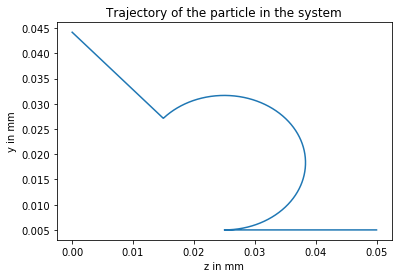

In [45]:
plot_Kinematic()

To test the tracker, we can reconstruct the momentum of the particle and compare it to the initial momentum:

In [46]:
def reconstruction():
    "Arguments:"
    "Return: the momentum of the particle"
    
    Z,Y,Vz,Vy=[],[],[],[]
    k,j=0,0
    
    Z,Y,Vz,Vy,k,j=Tracker()
    
    alpha=0
    p=0
    
    #Computation
    alpha=np.arctan((Y[len(Y)-1]-Y[k])/(Z[len(Z)-1]-Z[k]))
    p=q*np.abs(B)*L/np.sin(alpha)
    
    return (p)

In [47]:
reconstruction()

-0.0019985765861507453

In [48]:
def verification():
    "Arguments:"
    "Return: the error on the reconstruction"
    
    Z,Y,Vz,Vy=[],[],[],[]
    k,j=0,0
    p,eps=0,0
    
    Z,Y,Vz,Vy,k,j=Tracker()
    
    v=np.sqrt(Vz[j]**2+Vy[j]**2)
    gamma=1/np.sqrt(1-(v/c)**2)
    
    pt=np.sqrt(p_z0**2+p_y0**2)
    p=reconstruction()
    eps=(np.abs(pt-p)/pt)*100
    
    return(pt,eps)

In [49]:
verification()

(0.002, 199.92882930753726)